In [1]:
import warnings
warnings.filterwarnings("ignore", message="FP16 is not supported on CPU; using FP32 instead")# to ignore warning 


In [2]:
import matplotlib as plt
import seaborn as sns

In [3]:
import os
audio_folder = "/Users/chhavigupta/Downloads/voice_samples"
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]
print(audio_files)

['voice(13).wav', 'voice(1).wav', 'voice(0).wav', 'voice(12).wav', 'voice(15).wav', 'voice(7).wav', 'voice(6).wav', 'voice(14).wav', 'voice(5).wav', 'voice(9).wav', 'voice(8).wav', 'voice(16).wav', 'voice(4).wav', 'voice(3).wav', 'voice(11).wav', 'voice(10).wav', 'voice(2).wav']


In [4]:
import whisper

model = whisper.load_model("tiny")#load_model("base") will load pre trained whisper model base and also base has better accuracy then tiny

def transcribe_audio(file_path):
    result = model.transcribe(file_path)  # Transcribes the audio file
    return result['text']  # Extracts only the text (transcript)


In [5]:
import language_tool_python #is used to check spelling ,grammar and style in  english 
tool = language_tool_python.LanguageTool('en-US')
def get_grammar_score(text):
    matches = tool.check(text)#finds grammar/spelling issues
    num_errors = len(matches)#how many grammar issues
    words = len(text.split())#how many words in a text
    if words == 0:                      
        return 0, num_errors, matches
    score = max(0, 100 - (num_errors / words) * 100)#calculate grammar score 0 to 100
    return round(score,2),num_errors,matches

In [6]:
results = []

for file in audio_files:
    path = os.path.join(audio_folder, file)  
    transcript = transcribe_audio(path)
    score, errors, matches = get_grammar_score(transcript)

    results.append({
        "file": file,
        "transcript": transcript,
        "grammar_score": score,
        "errors": errors
    })


In [7]:
import pandas as pd

df = pd.DataFrame(results)
df.sort_values(by="grammar_score",inplace=True)#inplace = True is used to directly modify dataframe without making copy of it
print(df)

             file                                         transcript  \
11  voice(16).wav   Of course, much grumbling went on and little ...   
9    voice(9).wav   The skippers and the katas gymnastics served ...   
15  voice(10).wav   In short, my joyous individualism was dominat...   
0   voice(13).wav   A combination of Canadian capital quickly org...   
14  voice(11).wav   The Japanese understood as we could never sch...   
13   voice(3).wav   I also understand that similar branch organiz...   
12   voice(4).wav   He is too keenly intelligent, too sharply sen...   
10   voice(8).wav   The hunters are still arguing and roaring lik...   
8    voice(5).wav   The butchers and meat cutters refuse to handl...   
6    voice(6).wav   A wildly exciting time was his during the wee...   
5    voice(7).wav   Hans hurtled himself upon the prostrate man s...   
4   voice(15).wav   Mercedes screamed cried, laughed, and manifes...   
3   voice(12).wav   He also contended that better confidence was

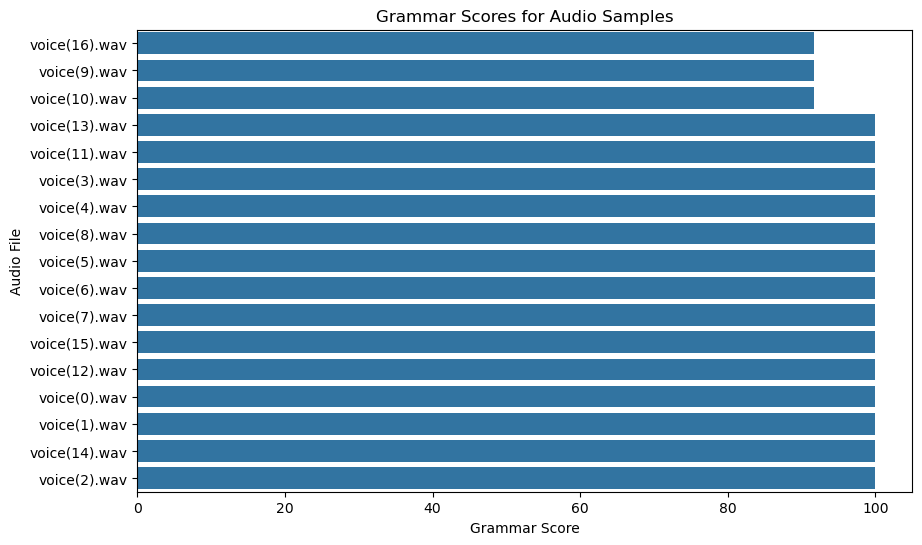

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))#10 width and 6 height
sns.barplot(x="grammar_score", y="file", data=df)
plt.title("Grammar Scores for Audio Samples")
plt.xlabel("Grammar Score")
plt.ylabel("Audio File")
plt.show()